# 底打ちどころを探る

## 目的

時価総額の大きい銘柄の値動きのトレンドを読むことで、底打ちどころを探る

In [1]:
import datetime
import re

import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
def get_code_into(code):
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    print(code, ticker.info['longName'])
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new   
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    print(ser.tail(3))

### 東証で時価総額上位

Reference: https://www.nikkei.com/marketdata/ranking-jp/market-cap-high/

In [3]:
pattern = re.compile(r'([0-9]{4}-[0-9]{2}-[0-9]{2}).*')

In [4]:
pattern_code = re.compile(r'^(.+)([0-9A]{4}).+$')

ods_name = 'mkt_capital_top_30.ods'
df_ods = pd.read_excel(ods_name)
list_code = list()
for name in df_ods['銘柄名']:
    m = pattern_code.match(name)
    if m:
        print(m.group(1))
        code = m.group(2)
        list_code.append(code)
    else:
        print('ERROR!', name)
print(list_code)

トヨタ
ソニーＧ
三菱ＵＦＪ
ファストリ
ＮＴＴ
日立
キーエンス
任天堂
三井住友ＦＧ
中外薬
リクルート
ＫＤＤＩ
伊藤忠
ＳＢ
三菱商
東京海上
ＳＢＧ
東エレク
ＪＴ
みずほＦＧ
三井物
信越化
三菱重
武田
第一三共
ホンダ
富士通
キヤノン
ＯＬＣ
ＨＯＹＡ
['7203', '6758', '8306', '9983', '9432', '6501', '6861', '7974', '8316', '4519', '6098', '9433', '8001', '9434', '8058', '8766', '9984', '8035', '2914', '8411', '8031', '4063', '7011', '4502', '4568', '7267', '6702', '7751', '4661', '7741']


In [5]:
dt = pd.to_datetime('2025-03-27')
dt

Timestamp('2025-03-27 00:00:00')

In [6]:
summary = pd.DataFrame()
for code in list_code:
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    if len(df) == 0:
        print('### no data in', symbol)
        continue
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new            
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    summary[code] = ser

summary

$8316.T: possibly delisted; no price data found  (1d 2025-03-24 -> 2025-04-07)


### no data in 8316.T


,7203,6758,8306,9983,9432,6501,6861,7974,4519,6098,...,8031,4063,7011,4502,4568,7267,6702,7751,4661,7741
2025-03-24,1.012197,0.974625,1.001377,0.973763,0.984000,1.001070,0.988840,0.969175,0.983236,0.994455,...,0.970608,0.980535,1.053786,0.994306,0.994916,1.031250,0.986138,0.984179,0.998713,0.988415
2025-03-25,1.019091,0.975142,0.993115,0.979355,0.983333,1.006153,0.988193,0.975975,0.999574,1.001085,...,0.975727,0.984738,1.032234,0.995401,0.994113,1.032280,0.964055,0.994658,1.002575,1.003673
2025-03-26,1.020859,0.997411,0.991049,0.993548,0.992000,1.014714,0.993692,1.027199,1.007387,0.993370,...,0.987450,0.990047,1.004310,0.992992,0.996521,1.025412,0.964055,0.996507,0.996138,1.006782
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.983672,0.983656,0.994573,0.985554,0.973799,0.989588,1.000426,0.970787,...,0.988415,0.986347,0.993978,0.999776,0.989749,0.973980,1.011334,0.989727,0.984516,0.991806
2025-03-31,0.941515,0.977414,0.938185,0.947527,0.981683,0.925094,0.945819,0.923372,0.965904,0.924312,...,0.940060,0.948075,0.950696,0.987690,0.947127,0.944093,0.955635,0.954387,0.950000,0.948290
2025-04-01,0.946734,0.977414,0.930254,0.955699,0.980326,0.919743,0.936115,0.932049,0.964342,0.940488,...,0.948623,0.947851,0.942416,1.009176,1.004316,0.945851,0.960492,0.965276,0.943226,0.931619
2025-04-02,0.955911,0.957944,0.916025,0.991398,0.968114,0.927501,0.935145,0.951685,0.935502,0.977064,...,0.936199,0.945837,0.965186,0.997762,0.966280,0.957103,0.957416,0.964660,0.924677,0.930206
2025-04-03,0.906424,0.911734,0.850478,0.974194,0.966757,0.867576,0.898916,0.920632,0.941611,0.961251,...,0.914876,0.921218,0.947497,1.016115,0.979768,0.934951,0.929080,0.916992,0.919355,0.887821
2025-04-04,0.866475,0.868380,0.778400,0.965591,0.977612,0.817014,0.884522,0.911225,0.945305,0.896910,...,0.890698,0.871531,0.891607,1.002014,0.976531,0.883966,0.909812,0.880214,0.941290,0.883865


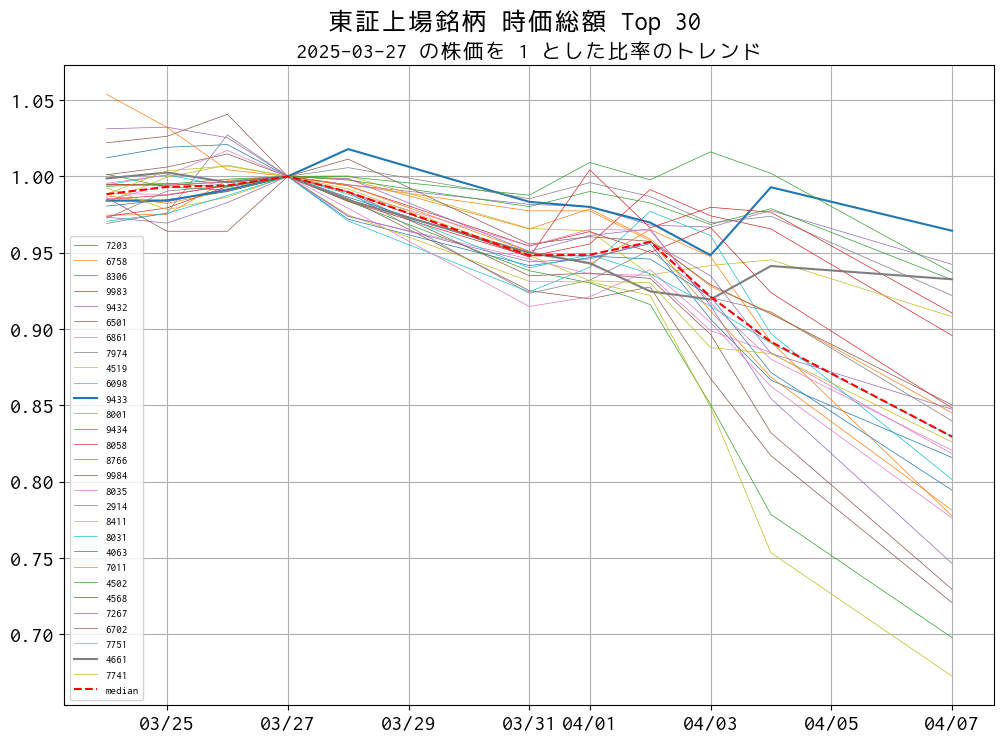

In [7]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(top=0.91)

for colname in summary.columns:
    """
    match colname:
        case '4502':
            width = 1.5
            lstyle = 'solid'
        case '9434':
            width = 1.5
            lstyle = 'solid'
        case '9432':
            width = 1.5
            lstyle = 'solid'
        case '9433':
            width = 1.5
            lstyle = 'solid'
        case '4568':
            width = 1.5
            lstyle = 'solid'
        case '2914':
            width = 1.5
            lstyle = 'solid'
        case _:
            width = 0.5
            lstyle = 'solid'
    """
    match colname:
        case '4661':
            width = 1.5
            lstyle = 'solid'
        case '9433':
            width = 1.5
            lstyle = 'solid'
        case _:
            width = 0.5
            lstyle = 'solid'

    ax.plot(summary[colname], lw=width, ls=lstyle, label=colname)

ax.plot(summary.median(axis=1), lw=1.5, color='red', ls='dashed', label='median')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
#ax.xaxis.set_ticks(df.index)

m = pattern.match(str(dt))
date_str = m.group(1)
fig.suptitle('東証上場銘柄 時価総額 Top 30')
ax.set_title('%s の株価を 1 とした比率のトレンド' % date_str, fontsize=16)
ax.grid()
ax.legend(loc='lower left', fontsize=8)

plt.savefig('report_bottom_out.png' )
plt.show()

In [8]:
for code in ['9434', '4661']:
    get_code_into(code)
    print()

9434 SoftBank Corp.
2025-04-03    0.968485
2025-04-04    0.978834
2025-04-07    0.932267
Name: Close, dtype: float64

4661 Oriental Land Co., Ltd.
2025-04-03    0.919355
2025-04-04    0.941290
2025-04-07    0.932581
Name: Close, dtype: float64



In [9]:
summary

,7203,6758,8306,9983,9432,6501,6861,7974,4519,6098,...,8031,4063,7011,4502,4568,7267,6702,7751,4661,7741
2025-03-24,1.012197,0.974625,1.001377,0.973763,0.984000,1.001070,0.988840,0.969175,0.983236,0.994455,...,0.970608,0.980535,1.053786,0.994306,0.994916,1.031250,0.986138,0.984179,0.998713,0.988415
2025-03-25,1.019091,0.975142,0.993115,0.979355,0.983333,1.006153,0.988193,0.975975,0.999574,1.001085,...,0.975727,0.984738,1.032234,0.995401,0.994113,1.032280,0.964055,0.994658,1.002575,1.003673
2025-03-26,1.020859,0.997411,0.991049,0.993548,0.992000,1.014714,0.993692,1.027199,1.007387,0.993370,...,0.987450,0.990047,1.004310,0.992992,0.996521,1.025412,0.964055,0.996507,0.996138,1.006782
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.983672,0.983656,0.994573,0.985554,0.973799,0.989588,1.000426,0.970787,...,0.988415,0.986347,0.993978,0.999776,0.989749,0.973980,1.011334,0.989727,0.984516,0.991806
2025-03-31,0.941515,0.977414,0.938185,0.947527,0.981683,0.925094,0.945819,0.923372,0.965904,0.924312,...,0.940060,0.948075,0.950696,0.987690,0.947127,0.944093,0.955635,0.954387,0.950000,0.948290
2025-04-01,0.946734,0.977414,0.930254,0.955699,0.980326,0.919743,0.936115,0.932049,0.964342,0.940488,...,0.948623,0.947851,0.942416,1.009176,1.004316,0.945851,0.960492,0.965276,0.943226,0.931619
2025-04-02,0.955911,0.957944,0.916025,0.991398,0.968114,0.927501,0.935145,0.951685,0.935502,0.977064,...,0.936199,0.945837,0.965186,0.997762,0.966280,0.957103,0.957416,0.964660,0.924677,0.930206
2025-04-03,0.906424,0.911734,0.850478,0.974194,0.966757,0.867576,0.898916,0.920632,0.941611,0.961251,...,0.914876,0.921218,0.947497,1.016115,0.979768,0.934951,0.929080,0.916992,0.919355,0.887821
2025-04-04,0.866475,0.868380,0.778400,0.965591,0.977612,0.817014,0.884522,0.911225,0.945305,0.896910,...,0.890698,0.871531,0.891607,1.002014,0.976531,0.883966,0.909812,0.880214,0.941290,0.883865


In [10]:
summary.median(axis=1)

2025-03-24    0.988415
2025-03-25    0.993115
2025-03-26    0.994111
2025-03-27    1.000000
2025-03-28    0.989749
2025-03-31    0.948290
2025-04-01    0.948623
2025-04-02    0.957103
2025-04-03    0.921218
2025-04-04    0.891607
2025-04-07    0.829416
dtype: float64